# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.756  1  1.280 0.259 0.007   
                             age        0.032  1  0.055 0.815 0.000   
                             Kiel       1.871  1  3.169 0.077 0.016   
                             Magdeburg  4.643  1  7.863 0.006 0.040   
                             Sweden     7.212  1 12.213 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.292  1  0.306 0.581 0.002   
                             age        0.702  1  0.736 0.392 0.004   
                             Kiel       0.086  1  0.090 0.764 0.000   
                             Magdeburg  1.951  1  2.046 0.154 0.011   
                             Sweden    17.268  1 18.106 0.000 0.087   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.586  0.416    False  
                             age               0.089  0.893    False  
                             Kiel              1.115  0.169    False  
                             Magdeburg         2.254  0.021     True  
                             Sweden            3.229  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.236  0.719    False  
                             age               0.407  0.557    False  
                             Kiel              0.117  0.856    False  
                             Magdeburg         0.812  0.287    False  
                             Sweden            4.485  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.753  1  4.731 0.031 0.024   
                             age        0.022  1  0.138 0.710 0.001   
                             Kiel       0.469  1  2.947 0.088 0.015   
                             Magdeburg  0.926  1  5.816 0.017 0.030   
                             Sweden     2.453  1 15.401 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.435  1  0.224 0.637 0.001   
                             age        2.368  1  1.221 0.271 0.006   
                             Kiel       8.404  1  4.332 0.039 0.022   
                             Magdeburg 13.941  1  7.186 0.008 0.036   
                             Sweden     0.515  1  0.266 0.607 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.511  0.078    False  
                             age               0.149  0.804    False  
                             Kiel              1.057  0.176    False  
                             Magdeburg         1.774  0.047     True  
                             Sweden            3.916  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.196  0.750    False  
                             age               0.568  0.415    False  
                             Kiel              1.412  0.093    False  
                             Magdeburg         2.097  0.026     True  
                             Sweden            0.217  0.726    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.259         0.586  0.416    False   
                             age       0.815         0.089  0.893    False   
                             Kiel      0.077         1.115  0.169    False   
                             Magdeburg 0.006         2.254  0.021     True   
                             Sweden    0.001         3.229  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.581         0.236  0.719    False   
                             age       0.392         0.407  0.557    False   
                             Kiel      0.764         0.117  0.856    False   
                             Magdeburg 0.154         0.812  0.287    False   
                             Sweden    0.000         4.485  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.031         1.511  0.078    False  
                             age       0.710         0.149  0.804    False  
                             Kiel      0.088         1.057  0.176    False  
                             Magdeburg 0.017         1.774  0.047     True  
                             Sweden    0.000         3.916  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.637         0.196  0.750    False  
                             age       0.271         0.568  0.415    False  
                             Kiel      0.039         1.412  0.093    False  
                             Magdeburg 0.008         2.097  0.026     True  
                             Sweden    0.607         0.217  0.726    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.480     0.338     0.244         2.745     0.310
std       0.306         5.316     0.334     0.297         5.163     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.328     0.015     0.002         0.362     0.008
50%       0.119         0.924     0.238     0.090         1.044     0.181
75%       0.470         2.422     0.626     0.435         2.719     0.579
max       1.000       149.241     1.000     0.999        83.908     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.259         0.586   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.281   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.032         1.498   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.455         0.342   
A0A075B6H7                                         AD     0.160         0.795   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.027         1.572   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.178         0.749   
S4R3U6                                             AD     0.581         0.236   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.416    False   
A0A024R0T9;K7ER74;P02655                           AD      0.125    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.084    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.612    False   
A0A075B6H7                                         AD      0.296    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.074    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.319    False   
S4R3U6                                             AD      0.719    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.031         1.511   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.446   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.200         0.698   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.295         0.530   
A0A075B6H7                                         AD     0.146         0.836   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.115         0.938   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.624         0.205   
S4R3U6                                             AD     0.637         0.196   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.078    False  
A0A024R0T9;K7ER74;P02655                           AD      0.088    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.333    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.441    False  
A0A075B6H7                                         AD      0.262    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.409     0.336     0.248         1.490     0.320
std       0.299         1.626     0.323     0.290         1.759     0.314
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.357     0.037     0.010         0.363     0.030
50%       0.116         0.937     0.233     0.108         0.966     0.209
75%       0.439         1.942     0.599     0.433         2.022     0.578
max       1.000        22.082     1.000     0.999        21.997     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1029,997


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.259         0.586  0.416   
A0A024R0T9;K7ER74;P02655                           0.052         1.281  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.032         1.498  0.084   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.455         0.342  0.612   
A0A075B6H7                                         0.160         0.795  0.296   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.027         1.572  0.074   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.178         0.749  0.319   
S4R3U6                                             0.581         0.236  0.719   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.031   
A0A024R0T9;K7ER74;P02655                              False 0.036   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.200   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.295   
A0A075B6H7                                            False 0.146   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.115   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.624   
S4R3U6                                                False 0.637   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.511  0.078   
A0A024R0T9;K7ER74;P02655                                   1.446  0.088   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.698  0.333   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.530  0.441   
A0A075B6H7                                                 0.836  0.262   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     0.938  0.219   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.205  0.740   
S4R3U6                                                     0.196  0.750   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    965
PI (yes) - QRILC (yes)   360
PI (no)  - QRILC (yes)    64
PI (yes) - QRILC (no)     32
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                             p-unc -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                   0.023         1.633  0.066   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2        0.013         1.893  0.041   
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78 0.068         1.167  0.154   
A0A087WWT2;Q9NPD7                            0.023         1.638  0.066   
A0A087X1V2                                   0.163         0.787  0.299   
...                                            ...           ...    ...   
Q9NZR2                                       0.014         1.851  0.044   
Q9P0K9                                       0.032         1.493  0.085   
Q9ULP0-3;Q9ULP0-6                            0.026         1.584  0.072   
Q9UNW1                                       0.003         2.559  0.012   
Q9UQ52                                       0.133         0.876  0.258   

                                                      QRILC                \
                                             rejected p-unc -Log10 pvalue   
protein groups                                                              
A0A075B6I0                                      False 0.002         2.752   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2            True 0.059         1.227   
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78    False 0.016         1.794   
A0A087WWT2;Q9NPD7                               False 0.007         2.137   
A0A087X1V2                                      False 0.017         1.761   
...                                               ...   ...           ...   
Q9NZR2                                           True 0.030         1.524   
Q9P0K9                                          False 0.009         2.023   
Q9ULP0-3;Q9ULP0-6                               False 0.012         1.921   
Q9UNW1                                           True 0.225         0.647   
Q9UQ52                                          False 0.003         2.479   

                                                                  data  
                                             qvalue rejected frequency  
protein groups                                                          
A0A075B6I0                                    0.007     True       194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2         0.130    False       114  
A0A087WVV2;A0A0A0MRV0;Q9P2E9;Q9P2E9-2;V9GY78  0.046     True       185  
A0A087WWT2;Q9NPD7                             0.024     True       193  
A0A087X1V2                                    0.048     True       178  
...                                             ...      ...       ...  
Q9NZR2                                        0.076    False       145  
Q9P0K9                                        0.030     True       192  
Q9ULP0-3;Q9ULP0-6                             0.036     True       136  
Q9UNW1                                        0.363    False       171  
Q9UQ52                                        0.012     True       188  

[96 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.416,0.078,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.125,0.088,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.084,0.333,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.612,0.441,196,PI (no) - QRILC (no)
A0A075B6H7,0.296,0.262,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.301,197,PI (no) - QRILC (no)
Q9Y6X5,0.074,0.219,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.676,0.016,86,PI (no) - QRILC (yes),0.661
P48147,0.040,0.676,79,PI (yes) - QRILC (no),0.636
Q9NS84,0.608,0.036,83,PI (no) - QRILC (yes),0.572
P06732,0.035,0.567,108,PI (yes) - QRILC (no),0.532
J3KSJ8;Q9UD71;Q9UD71-2,0.424,0.001,51,PI (no) - QRILC (yes),0.423
...,...,...,...,...,...
K7ERI9;P02654,0.040,0.054,196,PI (yes) - QRILC (no),0.014
J3KNC5;Q92832;Q92832-2,0.060,0.048,182,PI (no) - QRILC (yes),0.012
Q16706,0.050,0.042,195,PI (no) - QRILC (yes),0.008


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


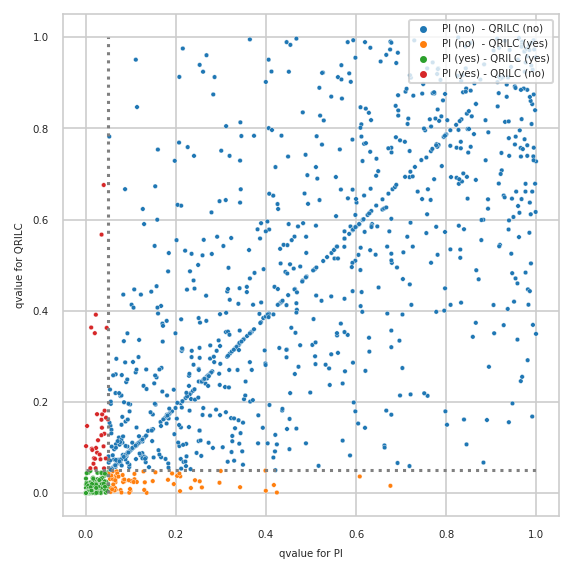

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


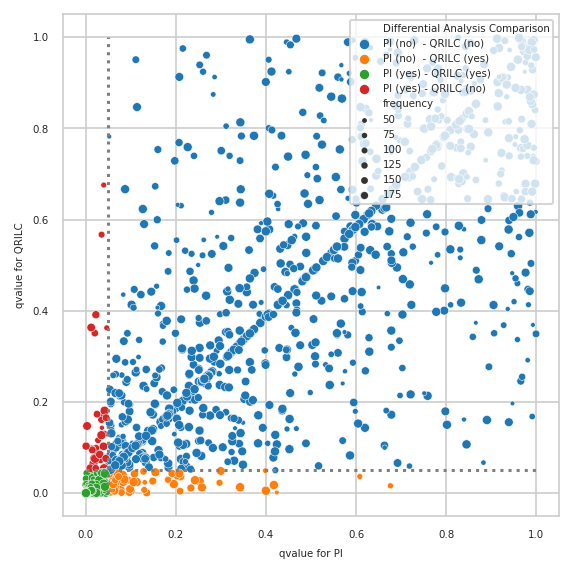

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.506


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out